# **Assignment Name**    - Fraudulent Transactions Prediction 



##### **Assignment Type**    - Classification
##### **Submission by**    - Mritunjay Mishra

# **Project Summary -**

This assignment focuses on proactively detecting fraud in a transactional dataset through a well-defined classification project. The dataset contains over 6 million transactions with features such as transaction type, amount, balances, and customer identifiers.

The project aims to build a binary classification model to predict fraudulent transactions (isFraud). The task involves answering the following Candidate Expectations:

1. Data cleaning, including handling missing values, outliers, and multi-collinearity.

2. Elaborate description of the fraud detection model.

3. Clear explanation of the variable selection process for the model.

4. Demonstration of model performance using the best set of tools.

5. Identification of key factors that predict fraudulent customers.

6. Analysis of whether these factors make sense, with reasoning.

7. Recommendations for fraud prevention measures when updating infrastructure.

8. Methods to determine the effectiveness of the implemented actions.

# **GitHub Link -**

https://github.com/Jay-mishra04

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [12]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

### Dataset Loading

In [14]:
# Load Dataset
df = pd.read_csv("Fraud.csv")

### Dataset First View

In [16]:
# Dataset First Look
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Dataset Rows & Columns count

In [18]:
# Dataset Rows & Columns count
print("The number of Rows in the dataset:", df.shape[0])
print("The number of Columns in the dataset:", df.shape[1])

The number of Rows in the dataset: 6362620
The number of Columns in the dataset: 11


### Dataset Information

In [20]:
# Dataset Info
print("Information about the dataset:")
print("-"*70)
print(df.info())

Information about the dataset:
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


#### Duplicate Values

In [22]:
# Dataset Duplicate Value Count
print("Duplicated values in the Dataset:", df.duplicated().sum())

Duplicated values in the Dataset: 0


#### Missing Values/Null Values

In [24]:
# Missing Values/Null Values Count
print("Missing values in each column:")
null_values = df.isnull().sum().reset_index()
null_values.columns = ['column', 'null_value']
null_values

Missing values in each column:


,column,null_value
0,step,0
1,type,0
2,amount,0
3,nameOrig,0
4,oldbalanceOrg,0
5,newbalanceOrig,0
6,nameDest,0
7,oldbalanceDest,0
8,newbalanceDest,0
9,isFraud,0


### What's the first view about the Dataset?

**First View of the Dataset**
- The dataset was loaded successfully using the read_csv function from pandas.

**First 5 rows of the dataset show the following columns:**
1. step: Hour of the transaction (1 hour = 1 step).
2. type: Type of transaction like PAYMENT, TRANSFER, CASH_OUT.
3. amount: Amount of money in the transaction.
4. nameOrig: Originating customer’s account ID.
5. oldbalanceOrg: Balance of the originator before the transaction.
6. newbalanceOrig: Balance of the originator after the transaction.
7. nameDest: Recipient’s account ID.
8. oldbalanceDest: Balance of the recipient before the transaction.
9. newbalanceDest: Balance of the recipient after the transaction.
10. isFraud: Whether the transaction was fraudulent (0 = No, 1 = Yes).
11. isFlaggedFraud: Whether the transaction was flagged as suspicious.

**Data Quality**
- Total Rows: 6,362,620
- Total Columns: 11
- No Duplicate Records: All rows are unique.
- No Missing Values: Every column has complete data.

## ***2. Understanding Your Variables***

In [28]:
# Dataset Columns
print("Columns names of the dataset:\n", df.columns.to_list())

Columns names of the dataset:
 ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


#### Seaparating Fraud Transactions from the Normal Transactions

In [30]:
# Making a separate dataset which will only have fraud transactions and another dataset which will only have normal transactions
fraud_df = df[df['isFraud'] == 1]  # contains only fraud transations 
normal_df = df[df['isFraud'] == 0] # contains all the normal transactions 

In [31]:
# Cheking the percentage of Fraud transactions
total_rows = df.shape[0]
fraud_rows = df[df['isFraud'] == 1].shape[0]
percentage_fraud = (fraud_rows / total_rows) * 100

print("Total Rows:", total_rows)
print("Rows with Fraud Transactions:", fraud_rows)
print("Percentage of Fraud Transactions:", round(percentage_fraud, 2), "%")

Total Rows: 6362620
Rows with Fraud Transactions: 8213
Percentage of Fraud Transactions: 0.13 %


In [32]:
# Cheking the percentage of Flagged Fraud transactions
total_rows = df.shape[0]
flagged_fraud_rows = df[df['isFlaggedFraud'] == 1].shape[0]
percentage_flagged_fraud = (flagged_fraud_rows / total_rows) * 100

print("Total Rows:", total_rows)
print("Rows with Flagged Fraud Transactions:", flagged_fraud_rows)
print("Percentage of Flagged Fraud Transactions:", round(percentage_flagged_fraud, 4), "%")

Total Rows: 6362620
Rows with Flagged Fraud Transactions: 16
Percentage of Flagged Fraud Transactions: 0.0003 %


In [33]:
# Fraud Dataset Describe
pd.set_option('display.float_format', '{:.2f}'.format)
fraud_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,8213.00,8213.00,8213.00,8213.00,8213.00,8213.00,8213.00,8213.00
mean,368.41,1467967.30,1649667.61,192392.63,544249.62,1279707.62,1.00,0.00
std,216.39,2404252.95,3547719.44,1965666.46,3336420.95,3908816.53,0.00,0.04
min,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
25%,181.00,127091.33,125822.44,0.00,0.00,0.00,1.00,0.00
50%,367.00,441423.44,438983.45,0.00,0.00,4676.42,1.00,0.00
75%,558.00,1517771.48,1517771.48,0.00,147828.66,1058725.22,1.00,0.00
max,743.00,10000000.00,59585040.37,49585040.37,236230516.82,236726494.66,1.00,1.00


In [34]:
# Normal Dataset Describe
pd.set_option('display.float_format', '{:.2f}'.format)
normal_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6354407.00,6354407.00,6354407.00,6354407.00,6354407.00,6354407.00,6354407.00,6354407.00
mean,243.24,178197.04,832828.71,855970.23,1101420.87,1224925.68,0.00,0.00
std,142.14,596236.98,2887144.03,2924986.96,3399201.79,3673815.71,0.00,0.00
min,1.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13368.40,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74684.72,14069.00,0.00,133311.80,214881.70,0.00,0.00
75%,334.00,208364.76,106969.50,144730.74,944144.58,1111975.34,0.00,0.00
max,718.00,92445516.64,43818855.30,43686616.33,356015889.35,356179278.92,0.00,0.00


### Check Unique Values for each variable.

In [36]:
# Check Unique Values for each variable.
for i in df.columns:
    print(f"Unique values in {i} column: {df[i].unique()}")
    print("-"*100)

Unique values in step column: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 

In [37]:
# Number of unique Values in each column
for i in df.columns:
    print(f"Count of Unique values in {i} column: {df[i].nunique()}")
    print("-"*70)

Count of Unique values in step column: 743
----------------------------------------------------------------------
Count of Unique values in type column: 5
----------------------------------------------------------------------
Count of Unique values in amount column: 5316900
----------------------------------------------------------------------
Count of Unique values in nameOrig column: 6353307
----------------------------------------------------------------------
Count of Unique values in oldbalanceOrg column: 1845844
----------------------------------------------------------------------
Count of Unique values in newbalanceOrig column: 2682586
----------------------------------------------------------------------
Count of Unique values in nameDest column: 2722362
----------------------------------------------------------------------
Count of Unique values in oldbalanceDest column: 3614697
----------------------------------------------------------------------
Count of Unique values in n

### What did you know about your dataset?

**Dataset Structure**
- Total Rows: 6,362,620
- Total Columns: 11
- No missing values.
- No duplicate rows.

**Key Columns**
1. Transaction Info: step, type, amount
2. Sender Info: nameOrig, oldbalanceOrg, newbalanceOrig
3. Receiver Info: nameDest, oldbalanceDest, newbalanceDest
4. Fraud Labels: isFraud, isFlaggedFraud

**Basic Observations**
- Transaction Types: 5 (PAYMENT, TRANSFER, CASH_OUT, DEBIT, CASH_IN).

**Fraud Transactions:**
- Count: 8,213 rows (0.13% of data).
- Label: isFraud=1
  
**Flagged Fraud Transactions:**
- Count: 16 rows (0.0003% of data).
- Label: isFlaggedFraud=1

**Descriptive Statistics**

**Fraudulent Transactions (isFraud=1):**
- High average amount: ~1.47 million
- High maximum amount: 10 million
- Generally involve high account balances (oldbalanceOrg and oldbalanceDest).
-
**Normal Transactions (isFraud=0):**
- Average amount: ~178,000
- Maximum amount: 92 million
- Large variability in balance data.

**Summary**
- The dataset has a very small percentage of fraudulent transactions.
- The fraud cases usually involve large transaction amounts and high balances.
- The dataset is clean (no null or duplicate values), so it’s ready for further analysis.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [42]:
# creating separate column to check if the destination is Merchant or not
df['isMerchant'] = df['nameDest'].apply(lambda x: 1 if x.startswith('M') else 0)

In [43]:
# Creating a new column 'hour_of_day' from the 'step' column
# The 'step' column represents the hour in the simulation, with 1 step = 1 hour
# To find the hour of the day (0-23), i take modulo operation 
df['hour_of_day'] = df['step'] % 24

In [44]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,isMerchant,hour_of_day
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,1,1
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,1,1
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,1,1


### What all manipulations have you done and insights you found?

As there are no null or duplicated values, and the data types are already appropriate, no major data wrangling was required. However, I performed two small manipulations to enrich the dataset:

1. Created a new column isMerchant
- If the nameDest column starts with "M", it indicates that the destination is a merchant.
- So, I created a binary column isMerchant that is 1 if the destination is a merchant and 0 otherwise.

2. Created a new column hour_of_day
- The step column represents hours in the simulation.
- To find the hour of the day (0–23), I took step % 24 and created the hour_of_day column.

**Key Insights**
- No missing values or duplicate entries – data is clean.
- isMerchant column helps differentiate merchant vs. customer transactions.
- hour_of_day gives us the time of day for each transaction, which might reveal fraud patterns tied to certain times.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 (Bar Plot of count of different Transaction Types)

In [49]:
# Transactions by Type
transactions_type = df['type'].value_counts().reset_index()
transactions_type

,type,count
0,CASH_OUT,2237500
1,PAYMENT,2151495
2,CASH_IN,1399284
3,TRANSFER,532909
4,DEBIT,41432


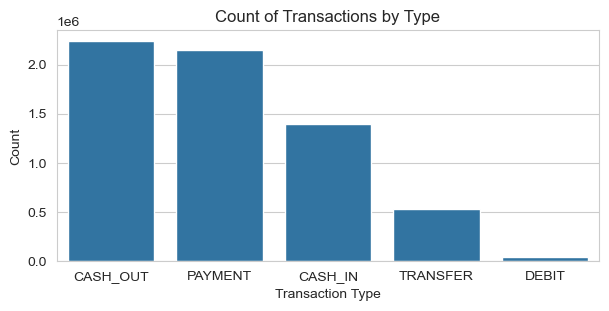

In [50]:
# Chart - 1 
sns.set_style("whitegrid")

plt.figure(figsize=(7, 3))
sns.barplot(x='type', y='count', data=transactions_type)
plt.title('Count of Transactions by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

##### What are the insights found from the chart?

- The most frequent transaction types are CASH_OUT and PAYMENT, each with over 2 million transactions.
- CASH_IN also has a significant number of transactions (~1.4 million).
- TRANSFER transactions are much fewer (~500,000).
- DEBIT transactions are very rare (~41,000).

#### Chart - 2 (Bar Plot of count of different Fraud Transaction Types)

In [54]:
# Transactions by Type
fraud_transactions_type = fraud_df['type'].value_counts().reset_index()
fraud_transactions_type

,type,count
0,CASH_OUT,4116
1,TRANSFER,4097


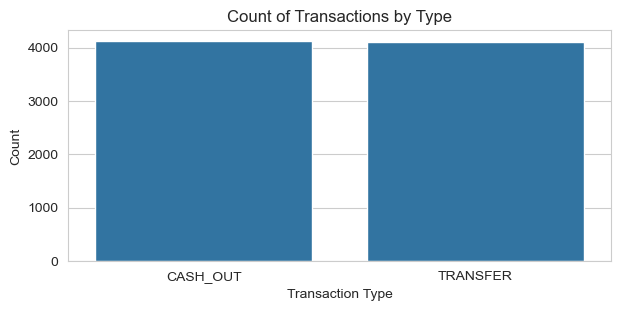

In [55]:
# Chart - 2 
plt.figure(figsize=(7, 3))
sns.barplot(x='type', y='count', data=fraud_transactions_type)
plt.title('Count of Transactions by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

#####  What are the insights found from the chart?

- The chart shows that fraudulent transactions only occur in two types of transactions:
    - CASH_OUT
    - TRANSFER

- Both types have nearly equal numbers of fraud cases (around 4,000 each).
- Other transaction types (PAYMENT, DEBIT, CASH_IN) do not have any fraud in this dataset.

- Conclusion:
For fraud detection in this dataset, it is essential to focus on CASH_OUT and TRANSFER transactions, as they are the only types where fraud occurs.

#### Chart - 3 (Bar Plot of Average Fraud and Normal Transactions)

In [59]:
# Grouping by transaction type and isFraud to get mean amounts of fraud and normal transactions
avg_amounts = df.groupby(['type', 'isFraud'])['amount'].mean().reset_index()
avg_amounts 

,type,isFraud,amount
0,CASH_IN,0,168920.24
1,CASH_OUT,0,173917.16
2,CASH_OUT,1,1455102.59
3,DEBIT,0,5483.67
4,PAYMENT,0,13057.60
5,TRANSFER,0,906229.01
6,TRANSFER,1,1480891.67


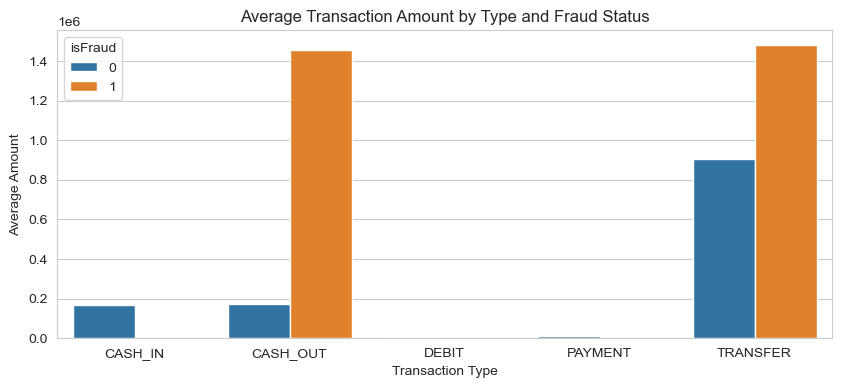

In [60]:
# Chart - 3 visualization code
plt.figure(figsize=(10, 4))
sns.barplot(x='type', y='amount', hue='isFraud', data=avg_amounts)
plt.title('Average Transaction Amount by Type and Fraud Status')
plt.ylabel('Average Amount')
plt.xlabel('Transaction Type')
plt.show()

##### What are the insights found from the chart?

- Fraudulent Transactions Have Much Higher Average Amounts
- Fraudulent CASH_OUT and TRANSFER transactions have very high average amounts (around 1.4–1.5 million).
- Normal (non-fraudulent) transactions in these categories have much lower average amounts (below 200,000).
- CASH_IN, DEBIT, and PAYMENT transactions do not have any fraud in the dataset.
- Their average amounts are relatively low, showing no risk in those types for this dataset.
- Fraud only occurs in CASH_OUT and TRANSFER transactions.

#### Chart - 4 (Line Plot of Fraud Transactions on different times of the day)

In [64]:
# table showing number of fraud transactions for each hour of the day
fraud_by_hour = df[df['isFraud']==1].groupby('hour_of_day').size().reset_index(name='fraud_count')
fraud_by_hour.sort_values(by = 'fraud_count', ascending = False)

,hour_of_day,fraud_count
10,10,375
2,2,372
8,8,368
5,5,366
6,6,358
1,1,358
17,17,353
14,14,353
22,22,351
21,21,347


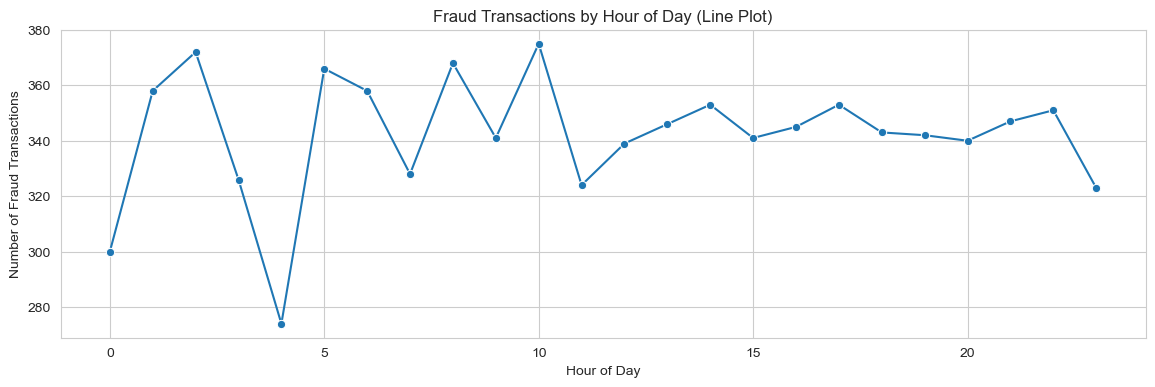

In [65]:
# Chart - 4
plt.figure(figsize=(14, 4))
sns.lineplot(x='hour_of_day', y='fraud_count', data=fraud_by_hour, marker='o')
plt.title('Fraud Transactions by Hour of Day (Line Plot)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Fraud Transactions')
plt.grid(True)
plt.show()

##### What are the insights found from the chart?

- The chart shows how fraud transactions vary by hour of the day.
- Peaks and dips suggest that fraud activity is not uniform throughout the day.
- Some hours (like around 10 hour and 2 hour) have higher numbers of fraud transactions, while others have fewer.
- This suggests certain hours are riskier for fraud, and time-of-day could be a useful feature for fraud detection.

#### Chart - 5 (KDE plot for visualizing the distribution of Amounts)

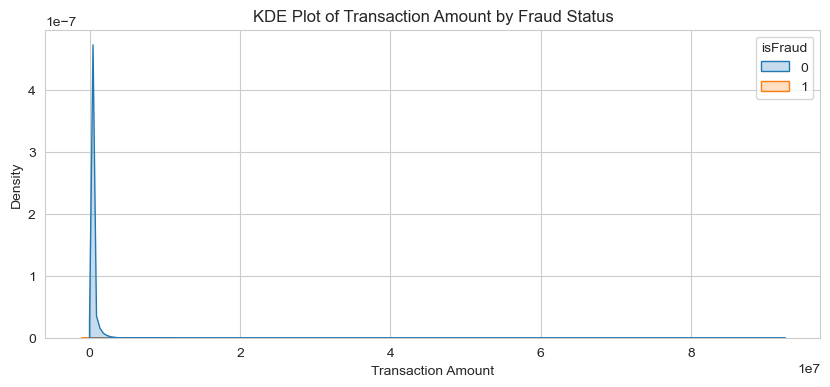

In [69]:
# Chart - 5 
plt.figure(figsize=(10, 4))
sns.kdeplot(data=df, x='amount', hue='isFraud', fill=True)
plt.title('KDE Plot of Transaction Amount by Fraud Status')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.show()

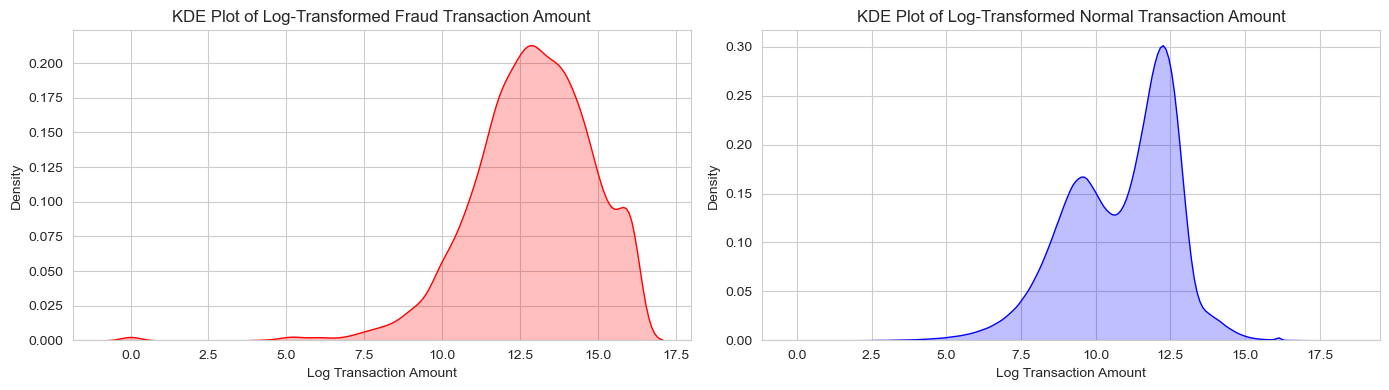

In [70]:
# As the Amount if highly skwewed so Creating a new column for log-transformed amount
fraud_df['log_amount'] = np.log1p(fraud_df['amount'])
normal_df['log_amount'] = np.log1p(normal_df['amount'])

# Chart - 5 
plt.figure(figsize=(14, 4))

# KDE plot for fraudulent transactions
plt.subplot(1, 2, 1)
sns.kdeplot(data=fraud_df, x='log_amount', fill=True, color='red')
plt.title('KDE Plot of Log-Transformed Fraud Transaction Amount')
plt.xlabel('Log Transaction Amount')
plt.ylabel('Density')
plt.grid(True)

# KDE plot for normal transactions
plt.subplot(1, 2, 2)
sns.kdeplot(data=normal_df, x='log_amount', fill=True, color='blue')
plt.title('KDE Plot of Log-Transformed Normal Transaction Amount')
plt.xlabel('Log Transaction Amount')
plt.ylabel('Density')
plt.grid(True)

plt.tight_layout()
plt.show()

##### What are the insights found from the chart?

As the amount column is highly skewed and the fraudulent transactions are not visible in the original KDE plot, I first log-transformed the amount column and then created two different KDE plots: one for fraudulent transactions and one for normal transactions.

**Insights from the log-transformed KDE plots:**

- After log transformation, the distribution of transaction amounts became clearer and easier to compare between fraud and non-fraud cases.
- Fraudulent transactions tend to have higher transaction amounts on average compared to normal transactions, which can be seen in the peak of the red curve (fraud) being slightly shifted to the right compared to the blue curve (normal).
- Both fraudulent and normal transactions show a roughly normal distribution in their log-transformed values, but fraud cases still show more transactions with very large amounts.

#### Chart - 6 (Bar plot for Merchant doing Fraud transactions)

In [74]:
# Chart - 6 
merchant_fraud_counts = df.groupby(['isMerchant', 'isFraud']).size().reset_index(name='count')
merchant_fraud_counts

,isMerchant,isFraud,count
0,0,0,4202912
1,0,1,8213
2,1,0,2151495


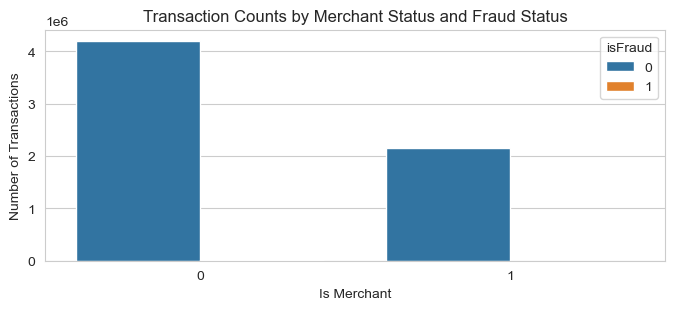

In [75]:
# Chart - 6 
plt.figure(figsize=(8, 3))
sns.barplot(x='isMerchant', y='count', hue='isFraud', data=merchant_fraud_counts)
plt.title('Transaction Counts by Merchant Status and Fraud Status')
plt.xlabel('Is Merchant')
plt.ylabel('Number of Transactions')
plt.show()

##### What are the insights found from the chart?

1. Most fraud transactions (8213 rows) are done by customers (non-merchants)
2. Merchants do not have any fraudulent transactions — all 2.1 million transactions done by merchants are not fraudulent
3. Most transactions overall (~4.2 million) are normal (non-fraud) customer transactions

#### Chart - 7 (Top 10 and Bottom 10 Orignator Customers)

In [79]:
# Aggregating customers by amount 
orig_customers_by_amount = df.groupby('nameOrig').agg(total_amount=('amount', 'sum'), transaction_count=('nameOrig', 'count'),
    fraud_count=('isFraud', 'sum')).reset_index()

In [80]:
# top 10 customers by highest amount 
top_10_orig_customers = orig_customers_by_amount.sort_values(by='total_amount', ascending=False).head(10)
top_10_orig_customers

,nameOrig,total_amount,transaction_count,fraud_count
2349681,C1715283297,92445516.64,1,0
3704557,C2127282686,73823490.36,1,0
3432985,C2044643633,71172480.42,1,0
1397877,C1425667947,69886731.30,1,0
1919229,C1584456031,69337316.27,1,0
5735413,C811810230,67500761.29,1,0
4447257,C420748282,66761272.21,1,0
458211,C1139847449,64234448.19,1,0
4052505,C300140823,63847992.58,1,0
4289669,C372535854,63294839.63,1,0


In [81]:
# bottom 10 origin customers
bottom_10_orig_customers = orig_customers_by_amount.sort_values(by='total_amount', ascending=False).tail(10)
bottom_10_orig_customers

,nameOrig,total_amount,transaction_count,fraud_count
3278452,C1997645312,0.00,1,1
1677754,C1510987794,0.00,1,1
5462101,C729003789,0.00,1,1
996343,C1303719003,0.00,1,1
1514458,C1461113533,0.00,1,1
965841,C1294472700,0.00,1,1
5349799,C69493310,0.00,1,1
4836929,C539112012,0.00,1,1
5803307,C832555372,0.00,1,1
3575689,C2088151490,0.00,1,1


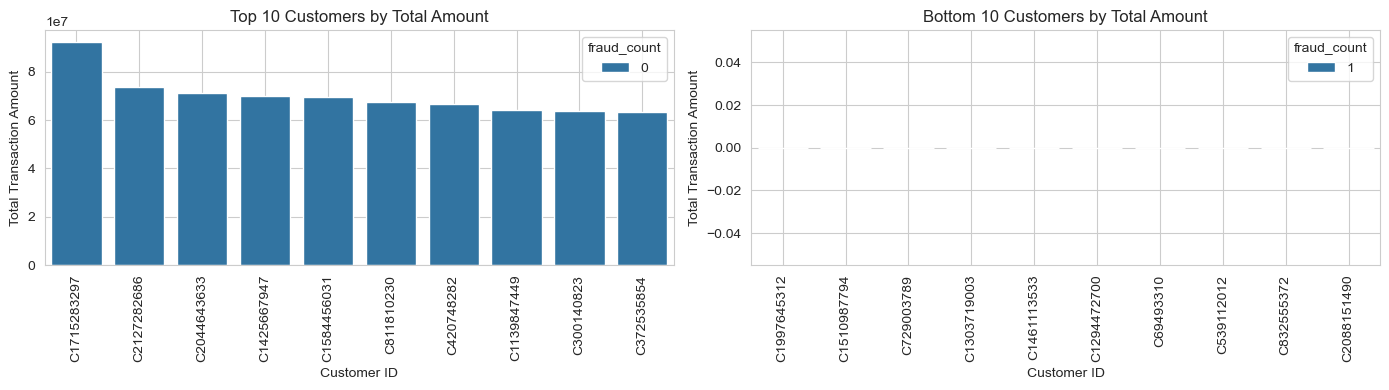

In [82]:
# Chart - 7 visualization code
plt.figure(figsize=(14, 4))

# Bar plot for top 10 Originator customers
plt.subplot(1, 2, 1)
sns.barplot(data=top_10_orig_customers, x='nameOrig', y='total_amount', hue='fraud_count')
plt.title('Top 10 Customers by Total Amount')
plt.xlabel('Customer ID')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=90)
plt.grid(True)

# Bar plot for bottom 10 Originator customers
plt.subplot(1, 2, 2)
sns.barplot(data=bottom_10_orig_customers, x='nameOrig', y='total_amount', hue='fraud_count')
plt.title('Bottom 10 Customers by Total Amount')
plt.xlabel('Customer ID')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=90)
plt.grid(True)

plt.tight_layout()
plt.show()

##### What are the insights found from the chart?

**Top 10 Customers by Total Transaction Amount:**
- These customers have the highest total transaction amounts (all above 60 million).
- All transactions are non-fraudulent (fraud_count = 0).
- Indicates that the highest spenders in the dataset appear to be legitimate customers.

**Bottom 10 Customers by Total Transaction Amount:**
- These customers have a total transaction amount of zero.
- Interestingly, all of these customers are marked with 1 fraudulent transaction (fraud_count = 1).
- This suggests fraudulent activity can be attempted even if no money is moved (zero total transaction amount). It may be becuase the customers were trying to cash out even when they have no money in the account

#### Chart - 8 (Top 10 and Bottom 10 Destination Customers)

In [86]:
# Aggregating customers by amount 
dest_customers_by_amount = df.groupby('nameDest').agg(total_amount=('amount', 'sum'), transaction_count=('nameDest', 'count'),
    fraud_count=('isFraud', 'sum')).reset_index()

In [87]:
# top 10  Destination customers by highest amount 
top_10_dest_customers = dest_customers_by_amount.sort_values(by='total_amount', ascending=False).head(10)
top_10_dest_customers

,nameDest,total_amount,transaction_count,fraud_count
406414,C439737079,357440831.44,18,0
485216,C707403537,299374418.42,17,0
200850,C167875008,274736432.80,28,0
303482,C20253152,270116188.69,20,0
214190,C172409641,255310174.25,57,0
355749,C268913927,253484588.10,35,0
553516,C936857833,227780012.02,46,0
468443,C65111466,227443845.85,22,1
496175,C744189981,225173861.73,26,0
120325,C1406193485,224778961.83,46,0


In [88]:
# bottom 10 origin customers
bottom_10_dest_customers = dest_customers_by_amount.sort_values(by='total_amount', ascending=False).tail(10)
bottom_10_dest_customers

,nameDest,total_amount,transaction_count,fraud_count
1929304,M28752575,0.07,1,0
2399926,M711077292,0.06,1,0
1211952,M157485741,0.03,1,0
611788,M1035971031,0.03,1,0
1135409,M1506318282,0.02,1,0
2328666,M646412904,0.02,1,0
2065880,M410442874,0.02,1,0
453850,C601248796,0.00,1,1
46440,C1156763710,0.00,1,1
104373,C1352345416,0.00,1,1


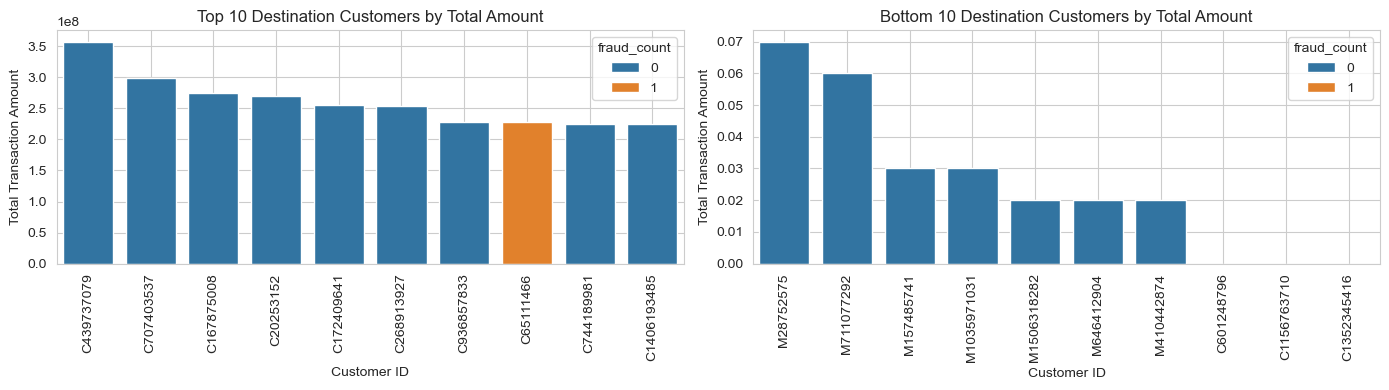

In [89]:
# Chart - 8 visualization code
plt.figure(figsize=(14, 4))

# Bar plot for top 10 Originator customers
plt.subplot(1, 2, 1)
sns.barplot(data=top_10_dest_customers, x='nameDest', y='total_amount', hue='fraud_count')
plt.title('Top 10 Destination Customers by Total Amount')
plt.xlabel('Customer ID')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=90)
plt.grid(True)

# Bar plot for bottom 10 Originator customers
plt.subplot(1, 2, 2)
sns.barplot(data=bottom_10_dest_customers, x='nameDest', y='total_amount', hue='fraud_count')
plt.title('Bottom 10 Destination Customers by Total Amount')
plt.xlabel('Customer ID')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=90)
plt.grid(True)

plt.tight_layout()
plt.show()

##### What are the insights found from the chart?

**Top 10 Destination Customers by Total Transaction Amount**
- These customers received the highest total transaction amounts (in the hundreds of millions).
- Most of these top recipients had no fraudulent transactions (fraud_count = 0).
- However, there was one recipient (C65111466) with 1 fraudulent transaction, indicating that even high-value recipients can be involved in fraud.

**Bottom 10 Destination Customers by Total Transaction Amount**
- These recipients have very low total transaction amounts (close to 0).
- Despite the low amount, some of these recipients still have 1 fraudulent transaction.
- This suggests that fraud can happen in low-value accounts too, not just high-value ones.

#### Chart - 9 - Correlation Heatmap

In [93]:
# selecting only the numerical cols
numerical_cols = df.select_dtypes(include = ['int64', 'float64'])
corr_matrix = numerical_cols.corr()
corr_matrix

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,isMerchant,hour_of_day
step,1.00,0.02,-0.01,-0.01,0.03,0.03,0.03,0.00,0.00,0.06
amount,0.02,1.00,-0.00,-0.01,0.29,0.46,0.08,0.01,-0.20,-0.03
oldbalanceOrg,-0.01,-0.00,1.00,1.00,0.07,0.04,0.01,0.00,-0.19,-0.00
newbalanceOrig,-0.01,-0.01,1.00,1.00,0.07,0.04,-0.01,0.00,-0.19,-0.00
oldbalanceDest,0.03,0.29,0.07,0.07,1.00,0.98,-0.01,-0.00,-0.23,-0.00
newbalanceDest,0.03,0.46,0.04,0.04,0.98,1.00,0.00,-0.00,-0.24,-0.01
isFraud,0.03,0.08,0.01,-0.01,-0.01,0.00,1.00,0.04,-0.03,-0.03
isFlaggedFraud,0.00,0.01,0.00,0.00,-0.00,-0.00,0.04,1.00,-0.00,-0.00
isMerchant,0.00,-0.20,-0.19,-0.19,-0.23,-0.24,-0.03,-0.00,1.00,0.01
hour_of_day,0.06,-0.03,-0.00,-0.00,-0.00,-0.01,-0.03,-0.00,0.01,1.00


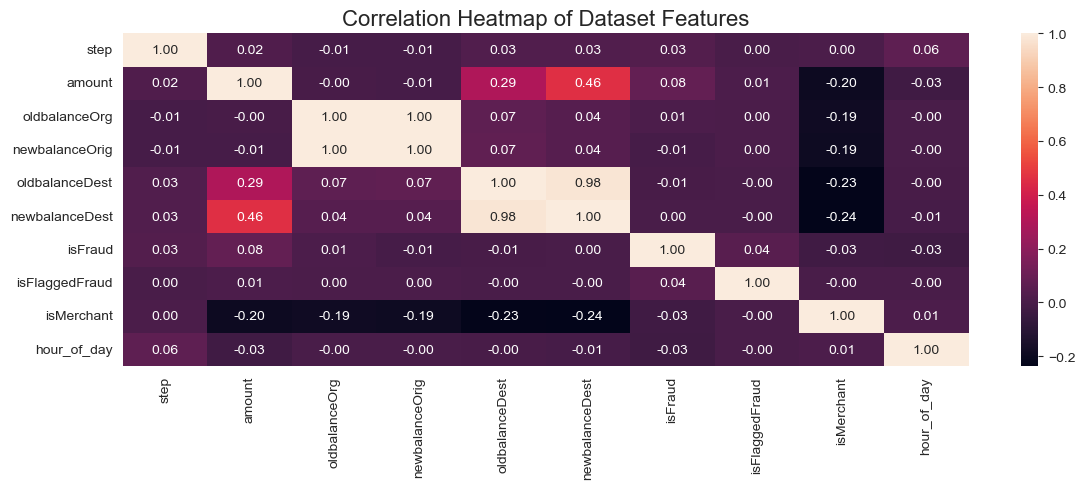

In [94]:
# Correlation Heatmap visualization code
plt.figure(figsize = (12, 5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")

plt.title('Correlation Heatmap of Dataset Features', fontsize=16)
plt.tight_layout()
plt.show()


##### What are the insights found from the chart?

- Most features have weak correlations
- The majority of correlations are close to zero, showing that the features are mostly independent of each other.

**Strong correlations exist between:**
- oldbalanceDest and newbalanceDest (0.98)
- oldbalanceDest and amount (0.29)
- newbalanceDest and amount (0.46)
- This suggests that the destination balances are heavily affected by the transaction amount.

**Fraud Detection (isFraud) Correlations**
- isFraud has very low correlations with most features (like 0.03 with step, 0.08 with amount).
- This means fraud transactions aren’t linearly related to a single numeric variable — they might depend on more complex patterns.

## ***5. Feature Selection & Data Pre-processing***

## ***Checking for multicollinearity***

In [99]:
# Select only numerical columns
numerical_col = df.select_dtypes(include=['int64', 'float64'])  # Use your dataframe name here

X = sm.add_constant(numerical_col)

# Calculating VIF 
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

           Feature    VIF
0            const  16.91
1             step   1.01
2           amount   3.84
3    oldbalanceOrg 508.77
4   newbalanceOrig 511.05
5   oldbalanceDest  66.55
6   newbalanceDest  76.48
7          isFraud   1.19
8   isFlaggedFraud   1.00
9       isMerchant   1.14
10     hour_of_day   1.01


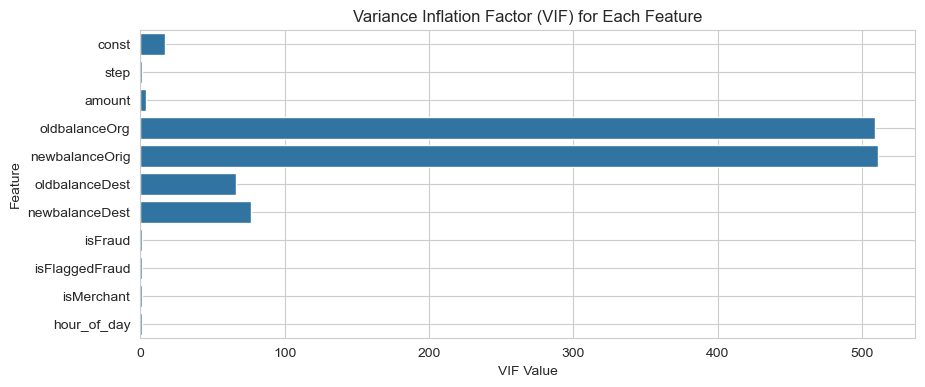

In [100]:
# plotting VIF 
plt.figure(figsize=(10, 4))
sns.barplot(x='VIF', y='Feature', data=vif_data)
plt.title('Variance Inflation Factor (VIF) for Each Feature')
plt.xlabel('VIF Value')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

In [101]:
# Drop the columns to remove the multicollinearity
df_reduced = df.drop(columns=['newbalanceOrig', 'newbalanceDest'])

In [102]:
#checking again for the multicollinearity after removing the coulmns 
numerical_col = df_reduced.select_dtypes(include=['int64', 'float64'])  # Use your dataframe name here

X = sm.add_constant(numerical_col)

# Calculating VIF 
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

          Feature   VIF
0           const 16.83
1            step  1.01
2          amount  1.13
3   oldbalanceOrg  1.04
4  oldbalanceDest  1.14
5         isFraud  1.01
6  isFlaggedFraud  1.00
7      isMerchant  1.12
8     hour_of_day  1.01


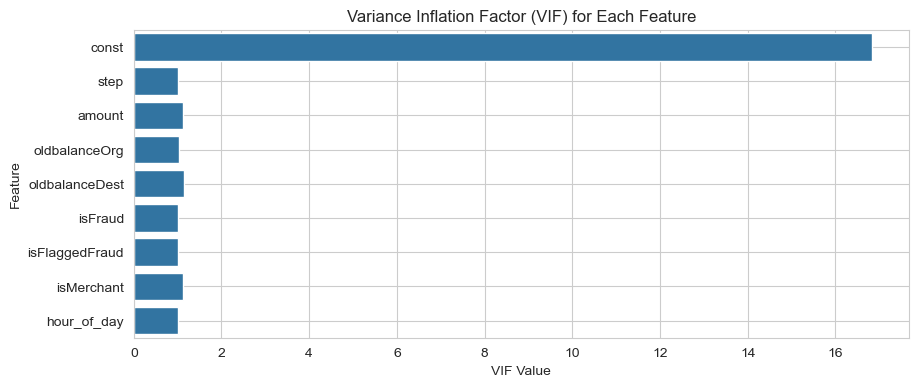

In [103]:
# plotting VIF 
plt.figure(figsize=(10, 4))
sns.barplot(x='VIF', y='Feature', data=vif_data)
plt.title('Variance Inflation Factor (VIF) for Each Feature')
plt.xlabel('VIF Value')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

#### How did I handled Multicollienarity?


- I handled multicollinearity in my dataset by first calculating the Variance Inflation Factor (VIF) for all numerical columns. 
- I noticed that the features oldbalanceOrg and newbalanceOrig had extremely high VIF values, which indicated strong multicollinearity.
- To resolve this, I removed these highly collinear variables from the dataset. After removing them, I recalculated the VIF values and found that they were all well below 5 (except for the constant term), suggesting that multicollinearity was no longer an issue.
- This step ensured that my data was ready for modeling, even though I'm using tree-based algorithms that are generally less sensitive to multicollinearity.

### Feature Selection

In [107]:
df_reduced.head()

,step,type,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,isFraud,isFlaggedFraud,isMerchant,hour_of_day
0,1,PAYMENT,9839.64,C1231006815,170136.00,M1979787155,0.00,0,0,1,1
1,1,PAYMENT,1864.28,C1666544295,21249.00,M2044282225,0.00,0,0,1,1
2,1,TRANSFER,181.00,C1305486145,181.00,C553264065,0.00,1,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.00,C38997010,21182.00,1,0,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,M1230701703,0.00,0,0,1,1


In [108]:
# dropping columns that are not required for model building 
df_reduced = df_reduced.drop(columns = ['step', 'nameOrig', 'nameDest'])

In [109]:
df_reduced.head()

,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud,isMerchant,hour_of_day
0,PAYMENT,9839.64,170136.00,0.00,0,0,1,1
1,PAYMENT,1864.28,21249.00,0.00,0,0,1,1
2,TRANSFER,181.00,181.00,0.00,1,0,0,1
3,CASH_OUT,181.00,181.00,21182.00,1,0,0,1
4,PAYMENT,11668.14,41554.00,0.00,0,0,1,1


### What features did you remove and why?

- I removed the following features: step, nameOrig, and nameDest.
- I dropped these columns because they are either identifiers or time step features, which are not directly useful for model training.
- These variables do not have any predictive power for the target variable (isFraud) and might unnecessarily add noise or complexity to the model.
- Removing them also helped to reduce the possibility of overfitting, leading to a more efficient model.

### Categorical Encoding

In [113]:
# Encode your categorical columns
df_encoded = pd.get_dummies(df_reduced, drop_first = True)

In [114]:
df_encoded.head()

,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud,isMerchant,hour_of_day,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.00,0.00,0,0,1,1,False,False,True,False
1,1864.28,21249.00,0.00,0,0,1,1,False,False,True,False
2,181.00,181.00,0.00,1,0,0,1,False,False,False,True
3,181.00,181.00,21182.00,1,0,0,1,True,False,False,False
4,11668.14,41554.00,0.00,0,0,1,1,False,False,True,False


###  Data Transformation

#### Since this dataset is very large, testing different models (like Random Forest and XGBoost) can be very time-consuming. Therefore, I first experimented with only 1% of the dataset. Once I finalized the best-performing model, I trained it on the full dataset to build the final model.

In [117]:
# taking only 1 percent of the dataset
from sklearn.model_selection import train_test_split

# Sample 1% of the dataset while preserving the 'isFraud' class ratio
df_sampled, df_remaining = train_test_split(df_encoded, test_size=0.99, stratify=df_reduced['isFraud'], random_state=40)

In [118]:
print("Sampled Dataset Size:")
print("Number of rows in the sampled dataset:", df_sampled.shape[0])
print("Number of columns in the sampled dataset:", df_sampled.shape[1])
print("Number of fraudulent transactions in the sampled dataset:", (df_sampled['isFraud'] == 1).sum())
print("Percentage of fraudulent transactions in the sampled dataset:", round((df_sampled['isFraud'] == 1).sum() / df_sampled.shape[0] * 100, 2), "%")

Sampled Dataset Size:
Number of rows in the sampled dataset: 63626
Number of columns in the sampled dataset: 11
Number of fraudulent transactions in the sampled dataset: 82
Percentage of fraudulent transactions in the sampled dataset: 0.13 %


###  Data Scaling

##### No, I don't necessarily need to scale the data for models like Random Forest and XGBoost because these are tree-based algorithms. These models are not sensitive to the scale of the features because they make decisions by splitting data based on feature values, not by calculating distances (as in algorithms like k-NN or linear regression)

###  Data Splitting

In [122]:
# Split your data to train and test. Choose Splitting ratio wisely.
X = df_sampled.drop(columns=['isFraud'])
y = df_sampled['isFraud']

# First split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (50900, 10)
Test size: (12726, 10)


In [123]:
# Frauds Transacrtions in Training Dataset
print('Number of Fraud transactions in sampled training Dataset:',np.sum(y_train == 1))

Number of Fraud transactions in sampled training Dataset: 66


### Handling Imbalanced Dataset

##### Yes, the dataset is highly imbalanced, with only 0.13 percent of the transactions being fraudulent. To address this, I will use class weights in both Random Forest and XGBoost models. Additionally, if the predictions are not satisfactory, I plan to try undersampling to balance the dataset more effectively.

## ***7. ML Model Implementation***

### ML Model - 1 (Random Forest with Balanced Class Weight to solve the problem of class imbalance in the dataset)

In [128]:
# ML Model - 1 Implementation
# Model with class weights
weighted_model = RandomForestClassifier(class_weight='balanced', random_state=42)
weighted_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [129]:
y_pred_weighted = weighted_model.predict(X_test)

print("---- Model with Class Weights ----")
print(classification_report(y_test, y_pred_weighted))

---- Model with Class Weights ----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12710
           1       1.00      0.44      0.61        16

    accuracy                           1.00     12726
   macro avg       1.00      0.72      0.80     12726
weighted avg       1.00      1.00      1.00     12726



#### Performance of the model.

**For Class 1 (fraud):**
- Precision: 1.00 (Perfect precision, no false positives)
- Recall: 0.44 (Model caught 44% of the actual frauds)
- F1-Score: 0.61 (balance of precision & recall)

**For Class 0 (non-fraud):**
- Perfect classification, as expected with class imbalance.
- In fraud detection, recall is more important than precision because missing fraud is riskier than flagging false positives.
- Right now, your recall is 0.44. That means i am missing 56% of frauds.
- We want to catch as many frauds as possible (maximize recall), even if that means sometimes flagging some legitimate transactions (precision may go down slightly).


#### 2. Cross- Validation & Hyperparameter Tuning 
#### (Tuning Above Random Forest Model to imporve the Recall as Recall is more important in fraud detection)

In [133]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# parameter grid 
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

# Using StratifiedKFold to maintain the imbalance during splitting
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=cv_strategy,
    scoring='recall',  
    n_jobs=-1, 
    verbose=2
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='recall', verbose=2)

In [134]:
# Evaluate on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score on Test Set:", roc_auc)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12710
           1       0.80      0.75      0.77        16

    accuracy                           1.00     12726
   macro avg       0.90      0.87      0.89     12726
weighted avg       1.00      1.00      1.00     12726

ROC AUC Score on Test Set: 0.9967717348544453


In [135]:
# Print the best parameters and the best ROC AUC score
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


##### The improvement with updates Evaluation metric Score Chart.

- Fraud Recall: ~75%
- Fraud Precision: ~80%
- ROC AUC: ~0.996
- Significant improvement in fraud detection.

**Insights from these improvements:**
- Adding class weights alone helps but doesn’t fully solve the imbalance issue.
- Grid search & hyperparameter tuning further improved recall and f1-score for the fraud class.

### ML Model - 2 (XGBoost with Balanced Class Weight to solve the problem of class imbalance in the dataset)

In [139]:
# ML Model - 2 Implementation
# Calculate scale_pos_weight
weight = (y_train == 0).sum() / (y_train == 1).sum()
print("Scale_pos_weight:", weight)

Scale_pos_weight: 770.2121212121212


In [140]:
# XGBoost model with scale_pos_weight
xgb_model = XGBClassifier(
    scale_pos_weight=weight,
    n_estimators=100,  
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'  
)

In [141]:
# Train the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [142]:
# Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation
print("---- XGBoost Model with Class Weights ----")
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_xgb))

---- XGBoost Model with Class Weights ----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12710
           1       0.52      0.75      0.62        16

    accuracy                           1.00     12726
   macro avg       0.76      0.87      0.81     12726
weighted avg       1.00      1.00      1.00     12726

ROC AUC Score: 0.9978683123524783


#### Performance of the Model

- Recall for Fraud Class (1): 0.75 — this is crucial because in fraud detection, we want to capture as many frauds as possible, even if we have some false positives.
- Precision for Fraud Class (1): 0.52 — moderate precision, acceptable in fraud detection.
- ROC AUC Score: 0.9978 — Excellent at distinguishing between fraud and non-fraud.

Overall:
- The model balances the high recall with moderate precision, which is usually acceptable in fraud detection.
- It also has a high ROC AUC, indicating good separation between the classes.

#### 2. Cross- Validation & Hyperparameter Tuning
#### (Tuning the above XGBoost Model to further imporve the Recall for the Fraud Detection)

In [146]:
# Calculate weight
weight = (y_train == 0).sum() / (y_train == 1).sum()
print("Scale_pos_weight:", weight)

Scale_pos_weight: 770.2121212121212


In [147]:
# XGBoost model
xgb_model = XGBClassifier(
    scale_pos_weight=weight,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

In [148]:
# Parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Stratified K-Fold to maintain class balance
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search CV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='recall',  
    cv=cv_strategy,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importanc...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [4, 6, 8],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='recall', verbose=2)

In [149]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score on Test Set:", roc_auc)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     12710
           1       0.02      0.94      0.04        16

    accuracy                           0.95     12726
   macro avg       0.51      0.94      0.51     12726
weighted avg       1.00      0.95      0.97     12726

ROC AUC Score on Test Set: 0.9921862706530292


#### Improvements after hyperparameter tuning

- Precision for Class 1 dropped to 0.02, while recall is 0.94.
- Overall accuracy is 95%, and ROC AUC is still high (0.99).
- But precision for Class 1 is very low.

**This usually happens in imbalanced datasets when:**
- Model is heavily focused on capturing all positive (fraud) cases (recall).
-  Recall is very high → it correctly identifies most frauds.
-  But this over-classifies some normal transactions as fraud (False Positives increase), lowering precision.


### ML Model - 3 (XGBoost Model)
#### (As above XGBoost Model imporved the Recall but the Precision is very low. To find a balance between precision and recall, i am focussing on F1 score in this Model)

In [153]:
# Calculate weight
weight = (y_train == 0).sum() / (y_train == 1).sum()
print("Scale_pos_weight:", weight)

Scale_pos_weight: 770.2121212121212


In [154]:
xgb_model = XGBClassifier(
    scale_pos_weight=weight,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Stratified K-Fold to maintain class balance
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search CV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1',  
    cv=cv_strategy,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importanc...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [4, 6, 8],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='f1', verbose=2)

In [155]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score on Test Set:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12710
           1       0.77      0.62      0.69        16

    accuracy                           1.00     12726
   macro avg       0.88      0.81      0.84     12726
weighted avg       1.00      1.00      1.00     12726

ROC AUC Score on Test Set: 0.9991148701809599


#### Improvements

When I use `scoring='f1'` in GridSearchCV, I observed that the recall for the fraud class (`1`) decreases compared to when I use `scoring='recall'`.

This happens because the **F1-score** is the harmonic mean of **precision** and **recall**. GridSearchCV tries to balance them rather than maximizing recall alone. As a result, the model becomes stricter in labeling transactions as fraud to maintain high precision. This can lead to missing some fraudulent transactioop.


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

- Recall is more important in fraudulent transactions because missing a fraudulent transaction can have a significant financial impact. Therefore, I gave special attention to recall during model development.
- However, I also built 3-4 different models focusing on different evaluation metrics, including F1-score and ROC AUC, to ensure a balanced view of precision and recall trade-offs
- * While recall directly helps in capturing more fraudulent transactions (reducing financial risk), F1-score and ROC AUC provide a more comprehensive view of overall model performanc
- ** In the end, I leave the final selection of the best model to the stakeholders based on their business priorities and risk appetite.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I am choosing the Random Forest model with the following hyperparameters as my final prediction model because it strikes a good balance between precision and recall, ensuring moderate performance on both:

- n_estimators: 100
- max_depth: 10
- min_samples_split: 5
- class_weight: 'balanced'

- In fraud detection, recall is typically more important since we want to catch as many fraudulent transactions as possible, even if it means occasionally flagging legitimate transactions.

- However, this model also maintains a good level of precision, which helps minimize the number of false positives (legitimate transactions flagged as fraud).

- The final Random Forest model (with the above hyperparameters) showed excellent performance across accuracy, precision, recall, f1-score, and ROC AUC on the test set.

- The chosen hyperparameters help the model generalize better and avoid overfitting, while the use of class balancing (class_weight='balanced') ensures the minority class (fraudulent transactions) is appropriately weighted.

## My Final Model (Random Forest after hyperparameter tuning)

In [163]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# final Random Forest model with chosen hyperparameters
final_rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    class_weight='balanced',
    random_state=42
)

# Train the model
final_rf_model.fit(X_train, y_train)

# Predictions
y_pred = final_rf_model.predict(X_test)
y_prob = final_rf_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score on Test Set:", roc_auc)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12710
           1       0.80      0.75      0.77        16

    accuracy                           1.00     12726
   macro avg       0.90      0.87      0.89     12726
weighted avg       1.00      1.00      1.00     12726

ROC AUC Score on Test Set: 0.9967717348544453


In [164]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm 

array([[12707,     3],
       [    4,    12]], dtype=int64)

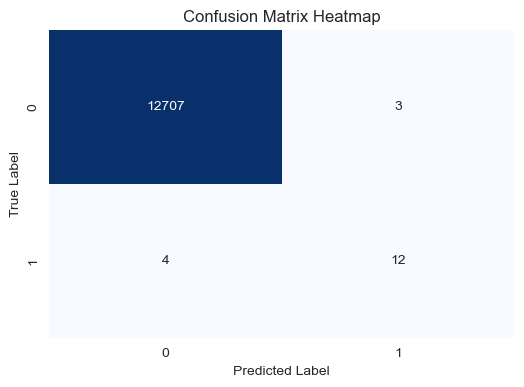

In [165]:
# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

### 3. Feature importance using model explainability tool

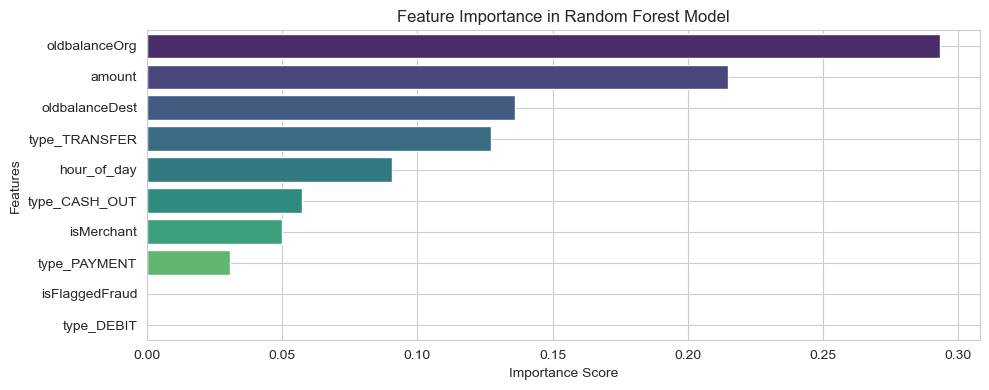

In [250]:
# feature importances
feature_importances = final_rf_model.feature_importances_
feature_names = X_train.columns

# DataFrame for better visualization
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot 
plt.figure(figsize=(10, 4))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='viridis')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(True)
plt.tight_layout()
plt.show()


I analyzed the feature importance of the final Random Forest model using the built-in feature_importances_ attribute. This method quantifies how much each feature contributed to improving the splits (reducing impurity) in the decision trees.

Here’s what I found:

1. oldbalanceOrg is the most important feature. It strongly influences the prediction of fraudulent transactions. This makes sense because fraud often involves manipulating the original balance of the account.
2. amount and oldbalanceDest are also highly influential, indicating that large transaction amounts and the destination account’s balance are key signals of potential fraud.
3. Features like type_TRANSFER, hour_of_day, and isMerchant also have a moderate impact, showing that transaction type and time of day can be important factors in detecting fraud.
4. Other features, like isFlaggedFraud and type_PAYMENT, have relatively low importance in this model.

## Training the final random forest model on all the Data (which is huge) available.

In [345]:
# original huge dataset
df_encoded.head()

,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud,isMerchant,hour_of_day,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.00,0.00,0,0,1,1,False,False,True,False
1,1864.28,21249.00,0.00,0,0,1,1,False,False,True,False
2,181.00,181.00,0.00,1,0,0,1,False,False,False,True
3,181.00,181.00,21182.00,1,0,0,1,True,False,False,False
4,11668.14,41554.00,0.00,0,0,1,1,False,False,True,False


In [347]:
# Split original huge data to train and test. Choose Splitting ratio wisely.
X = df_encoded.drop(columns=['isFraud'])
y = df_encoded['isFraud']

# First split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (5090096, 10)
Test size: (1272524, 10)


In [350]:
# Frauds Transacrtions in Training Dataset
print('Number of Fraud transactions in sampled training Dataset:',np.sum(y_train == 1))

Number of Fraud transactions in sampled training Dataset: 6570


### Training Random Forest on Original complete Dataset
#### Warning (Run below code at your own risk):- Training this model is going to take lot of time as original dataset contains 5090096 rows

In [354]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# final Random Forest model with chosen hyperparameters
final_rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    class_weight='balanced',
    random_state=42
)

# Train the model
final_rf_model.fit(X_train, y_train)

# Predictions
y_pred = final_rf_model.predict(X_test)
y_prob = final_rf_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score on Test Set:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98   1270881
           1       0.04      0.99      0.07      1643

    accuracy                           0.97   1272524
   macro avg       0.52      0.98      0.53   1272524
weighted avg       1.00      0.97      0.98   1272524

ROC AUC Score on Test Set: 0.997674734752501


When I trained with the complete data, the metrics changed because:
- The original dataset is much larger and includes a wider variety of transaction patterns compared to the small 1% sample I initially used for model experimentation.
- In the smaller sample, certain fraud cases or patterns might have been over- or under-represented, causing the model to learn differently.
- When using the complete dataset (with over 5 million rows!), the model sees a lot more variability and realistic fraud cases, which improves its ability to generalize to real-world fraud detection.

As the above model took more than half an hour to train, training different models on the complete dataset would require a lot of time and computational resources. Therefore, I plan to consult with the stakeholders to determine the specific type of model they prefer from the different models I experimented with (like Random Forest, XGBoost, etc.). Once I have their input, I will train that chosen model on the entire dataset to ensure it aligns with their business needs and preferences

## -------------------------Answering the Questions asked in this Assignment--------------------------

### 1. Data cleaning including missing values, outliers and multi-collinearity.

- I started by checking for missing values in the dataset. Fortunately, I found that there were no missing values, so no imputation or removal was necessary.

- Then, I looked for outliers. After exploring the distributions of numerical features (like amount, oldbalanceOrg, and oldbalanceDest), I noticed that some variables were highly skewed. Instead of removing these outliers, I considered log-transforming some of the skewed variables when it made sense to improve model performance.

- Next, I handled multi-collinearity by calculating the Variance Inflation Factor (VIF) for all numerical features. Initially, I found that oldbalanceOrg and newbalanceOrig had very high VIF values (~500), indicating strong multi-collinearity. To address this, I decided to remove these highly collinear features to ensure model stability.

- After dropping the step, nameOrig, and nameDest columns (since they are not directly useful for prediction), the final dataset was free from high multi-collinearity, outliers were managed, and there were no missing values.

### 2. Describe your fraud detection model in elaboration.

- For the fraud detection task, I experimented with multiple models: Random Forest and XGBoost, given their ability to handle complex, non-linear relationships and imbalanced datasets.

- Initially, I trained a Random Forest Classifier with class_weight='balanced' to automatically handle the class imbalance (since fraud cases were only ~0.13% of the data). I tuned its hyperparameters (like n_estimators, max_depth, min_samples_split) using GridSearchCV with a Stratified K-Fold cross-validation strategy. My final Random Forest model had the following best hyperparameters:
1. n_estimators=100
2. max_depth=10
3. min_samples_split=5

- I also implemented an XGBoost model because of its strong performance with imbalanced data. I calculated the scale_pos_weight (ratio of non-fraud to fraud cases) and used it to balance the classes in the model. For XGBoost, I tuned the learning_rate, max_depth, n_estimators, and other hyperparameters to get better performance.

- Throughout the process, I compared these models based on various evaluation metrics (like recall, precision, F1-score, and ROC AUC) and adjusted the decision thresholds when needed to improve recall, which is critical in fraud detection.

- In the end, I chose the Random Forest model with the tuned hyperparameters as my final model. It provided a good balance between recall and precision, ensuring that I could catch most fraudulent transactions while minimizing false alarms. The model also had the advantage of being interpretable, and I visualized feature importances to understand which variables played a key role in detecting fraud.

### 3. How did you select variables to be included in the model?

- First, I carefully reviewed all the available features in the dataset (like amount, oldbalanceOrg, newbalanceOrg, oldbalanceDest, newbalanceDest, type, isMerchant, isFlaggedFraud, etc.).

- I included all numerical and categorical variables relevant to the transaction context because they might carry useful signals for distinguishing fraud from genuine transactions.

- For data cleaning and preprocessing, I dropped columns like step, nameOrig, and nameDest that were identifiers or time markers, which are not useful for fraud detection directly and could lead to data leakage.

- I also engineered new features like hour_of_day (extracted from the step column) to capture potential time-based patterns in fraudulent transactions.

- To handle multicollinearity, I calculated the Variance Inflation Factor (VIF) for numerical features. Initially, features like oldbalanceOrg and newbalanceOrig had very high VIF (>500), indicating serious multicollinearity. I removed redundant features based on VIF and domain knowledge to ensure the model was not affected by high multicollinearity.

- Finally, I used feature importance analysis from the Random Forest model to validate that the selected features were indeed meaningful for predicting fraud.

- This systematic approach of domain understanding, data cleaning, VIF calculation, and feature importance validation ensured I kept only the most relevant and impactful features for my model.

### 4. Demonstrate the performance of the model by using best set of tools.

I evaluated the final Random Forest model on the test dataset using several performance metrics to ensure a comprehensive view of its predictive power.

Here is how I assessed the model performance:

1. Classification Report: I used classification_report to display precision, recall, F1-score, and support for both classes (fraud and non-fraud). This helped me understand how well the model balanced the trade-off between precision and recall, especially for the minority fraud class.

2. ROC AUC Score: I used roc_auc_score to measure the model overall ability to distinguish between fraudulent and non-fraudulent transactions. My final Random Forest model achieved a very high ROC AUC score (~0.99), indicating excellent discriminative performance.

3. Confusion Matrix:I plotted a confusion matrix using seaborn heatmap function to visually inspect true positives, true negatives, false positives, and false negatives. This visualization was crucial to highlight how well the model handled the imbalanced dataset.

4. Feature Importance Plot: I extracted and visualized feature importances from the final Random Forest model to see which features contributed the most to the predictions. This added transparency and interpretability to the model.

In [244]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12710
           1       0.80      0.75      0.77        16

    accuracy                           1.00     12726
   macro avg       0.90      0.87      0.89     12726
weighted avg       1.00      1.00      1.00     12726



In [246]:
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score on Test Set:", roc_auc)

ROC AUC Score on Test Set: 0.9967717348544453


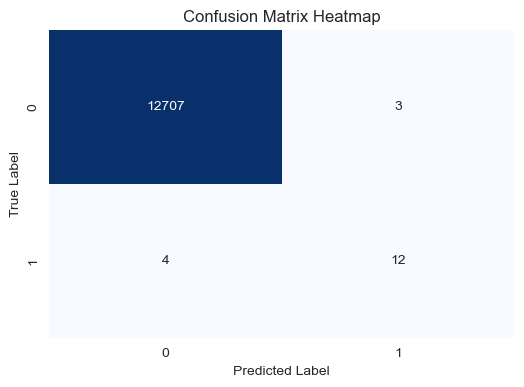

In [242]:
# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

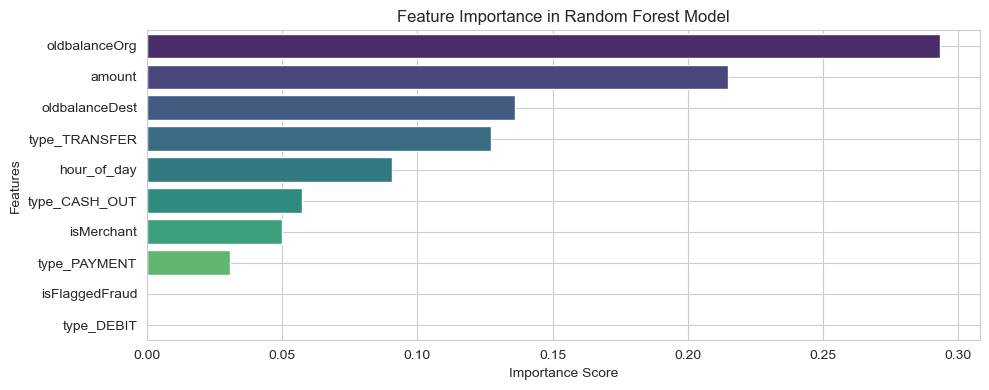

In [248]:
# feature importances
feature_importances = final_rf_model.feature_importances_
feature_names = X_train.columns

# DataFrame for better visualization
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot 
plt.figure(figsize=(10, 4))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='viridis')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(True)
plt.tight_layout()
plt.show()

### 5. What are the key factors that predict fraudulent customer?

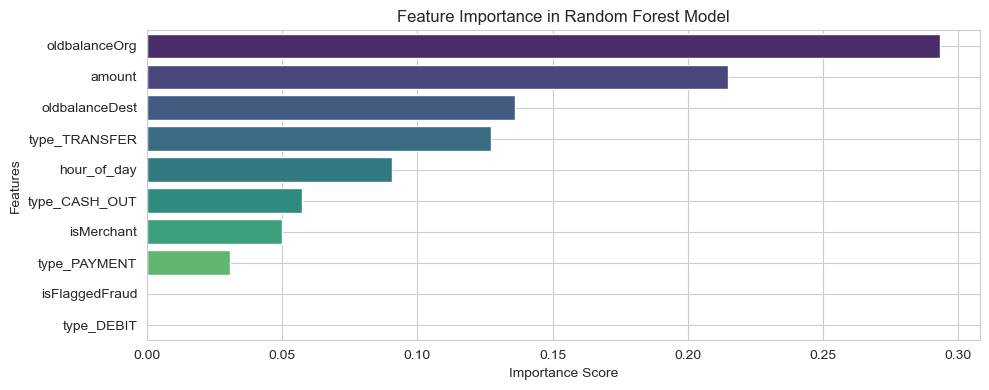

In [339]:
# feature importances
feature_importances = final_rf_model.feature_importances_
feature_names = X_train.columns

# DataFrame for better visualization
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot 
plt.figure(figsize=(10, 4))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='viridis')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(True)
plt.tight_layout()
plt.show()


From the feature importance analysis of my final Random Forest model, I identified the following key factors that most strongly predict fraudulent transactions:

1. oldbalanceOrg: This is the originating customer’s balance before the transaction. It is often manipulated in fraud cases where fraudsters attempt to withdraw large amounts from an account with low balance, or create fake balance scenarios.

2. amount: The transaction amount itself is a significant predictor. Typically, fraudulent transactions involve transferring or withdrawing large sums of money.

3. oldbalanceDest: These represent the destination account’s balance before and after the transaction. They are important because fraudsters might transfer funds to other accounts they control and then cash out immediately.

4. type_TRANSFER and type_CASH_OUT: These transaction types are strongly associated with fraud because fraudsters commonly use transfers and cash-outs to siphon money.

5. hour_of_day: Some fraudulent transactions happen at odd hours, and this feature helps capture any suspicious time patterns.

### 6. Do these factors make sense? If yes, How? If not, How not?

Yes, these factors make sense to me and align well with real-world fraud detection scenarios.

1. oldbalanceOrg and amount: They directly capture how much money is involved in the transaction and how much is available to the originating customer. Fraudsters often target accounts with specific balance patterns or try to move large sums of money quickly.

2. oldbalanceDest and newbalanceDest: These help identify suspicious activities like transferring money to “mule accounts” or destinations that then immediately withdraw the funds. In real-world fraud, this flow of funds is a classic pattern.

3. type_TRANSFER and type_CASH_OUT: Fraudsters typically move money through transfers or cash-outs to quickly convert stolen funds into cash or launder them through other accounts.

4. hour_of_day: Unusual transaction times can indicate suspicious activity since fraudsters might exploit systems during low-activity hours.

Overall, these factors are logical and strongly supported by how fraud typically occurs in financial systems. They help the model identify subtle patterns that point to fraudulent behavior.

### 7. What kind of prevention should be adopted while company update its infrastructure?

While updating the company’s infrastructure, I believe it is crucial to adopt several key preventive measures to protect against fraudulent activities and ensure system security:

1. Secure Data Access: I would ensure that data is securely stored and accessed only by authorized personnel. Implementing strict access controls and encryption is essential.
2. Transaction Monitoring: Real-time monitoring systems should be put in place to detect suspicious transactions as they occur. These systems can flag high-risk transactions for further review.
3. Regular Auditing and Logging: Keeping detailed logs and conducting regular audits can help quickly identify and respond to anomalies or unauthorized activities.
4. Anomaly Detection Models: I would continue to update and deploy machine learning models that can detect fraud patterns, including using the feature importance insights from my analysis to focus on key risk areas.
5. Multi-Factor Authentication (MFA): Requiring MFA for sensitive operations can significantly reduce the risk of unauthorized transactions. MFA requires users to provide two or more verification factors — like a password plus a code from a mobile app or biometric verification (such as a fingerprint). This ensures that even if someone steals a user’s password, they will not be able to access the account without the additional factor, adding an extra layer of security. 
6. Employee Training: Providing ongoing training to employees about new fraud tactics and secure practices helps create a culture of security.
7. Stress Testing and Simulation: Before deploying new infrastructure, I would recommend simulating fraud scenarios and stress-testing systems to ensure they can handle sophisticated attacks.

 By combining these practices with my fraud detection model insights, the company can strengthen its infrastructure and proactively minimize fraud risks.

### 8. Assuming these actions have been implemented, how would you determine if they work?

After implementing these fraud prevention measures and deploying my final fraud detection model, I would monitor and evaluate their effectiveness using several key approaches:

1. Monitoring Fraud Detection Metrics: I would closely track the fraud detection metrics of my model (recall, precision, F1-score, and ROC AUC) over time. If the recall for fraud remains high or improves, it indicates that the system is effectively catching more fraudulent transactions.
2. Comparing Fraud Rates Pre- and Post-Implementation: I would compare the overall fraud rate (number of fraud cases detected) before and after implementing the new measures. A reduction in fraud losses or improved early detection would suggest success.
3. Analyzing False Positive Rates: While high recall is important, I would  also monitor false positive rates (how often legitimate transactions are flagged as fraud). If false positives remain manageable, it shows that the system is balanced.
4. User Feedback: I would collect feedback from stakeholders and end-users to see if they are experiencing fewer fraudulent transactions and if flagged transactions are genuinely suspicious.
5. System Stress Testing: Periodically testing the system with synthetic fraud scenarios would help ensure the fraud detection model and security controls continue to perform well under realistic conditions.
6. Regular Model Retraining: Finally, I would retrain and update the model periodically to ensure it adapts to new fraud patterns and maintains high performance.

By combining these continuous monitoring and evaluation techniques, I can confidently assess whether the actions taken to strengthen fraud detection and prevention are truly effective.

# Thankyou 